# Original tweet analysis

We start by importing all the packages that we'll need.

In [1]:
import data
import ngram_utils
import word_cloud
import timeline
import utils
from config import ngram_stop_words, bigrams_to_remove, trigrams_to_remove, fourgrams_to_remove
import pandas as pd
from collections import Counter

## Import data

In [2]:
tweets = data.get_original_tweets(remove_mentions=False, remove_hashtags=True, remove_urls=True)

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [4]:
tweets.columns

Index(['id', 'author_id', 'created_at', 'reply_settings', 'conversation_id',
       'source', 'in_reply_to_user_id', 'text', 'possibly_sensitive', 'lang',
       'referenced_tweets', 'referenced_tweets.id',
       'referenced_tweets.author_id', 'referenced_tweets.type',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'entities.mentions', 'entities.urls', 'entities.hashtags',
       'entities.annotations', 'attachments.media_keys',
       'attachments.media_types', 'user.description', 'user.verified',
       'user.id', 'user.protected', 'user.url', 'user.profile_image_url',
       'user.location', 'user.name', 'user.created_at', 'user.username',
       'user.public_metrics.followers_count',
       'user.public_metrics.following_count',
       'user.public_metrics.tweet_count', 'user.public_metrics.listed_count',
       'user.entities.description.hashtags', 'user.entities.url.urls',
       'user

In [5]:
tweets.describe()

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,user.public_metrics.followers_count,user.public_metrics.following_count,user.public_metrics.tweet_count,user.public_metrics.listed_count
count,10061.000000,10061.000000,10061.000000,10061.000000,10061.000000,10061.000000,10061.000000,10061.000000
mean,1.596163,0.100586,3.598946,0.197296,3645.018487,1100.606799,5328.124838,115.407415
std,2.373692,0.368788,5.142142,0.790058,1256.261402,428.143130,3099.266631,63.850969
min,0.000000,0.000000,0.000000,0.000000,1363.000000,288.000000,755.000000,20.000000
25%,0.000000,0.000000,0.000000,0.000000,2418.000000,778.000000,3036.000000,61.000000
50%,1.000000,0.000000,2.000000,0.000000,4188.000000,823.000000,3123.000000,92.000000
75%,2.000000,0.000000,5.000000,0.000000,4763.000000,1548.000000,8807.000000,185.000000
max,59.000000,12.000000,141.000000,45.000000,4763.000000,1548.000000,8807.000000,185.000000


## Authors

In [6]:
tweets_by_author = utils.get_tweets_by_authors(tweets, utils.author_ids)

## Find most common terms

In [7]:
tweet_words = utils.tweets_to_words(tweets)
most_common_terms = Counter(tweet_words).most_common(50)
most_common_terms

[('helsinki', 2073),
 ('city', 837),
 ('smart', 707),
 ('open', 453),
 ('finland', 446),
 ('data', 334),
 ('kaupunki', 324),
 ('business', 307),
 ('read', 297),
 ('vuosi', 288),
 ('tervetuloa', 286),
 ('companies', 269),
 ('great', 267),
 ('virium', 259),
 ('kalasatama', 258),
 ('finnish', 258),
 ('region', 245),
 ('project', 244),
 ('join', 235),
 ('mobility', 233),
 ('world', 218),
 ('lue', 211),
 ('solutions', 209),
 ('event', 207),
 ('urban', 204),
 ('one', 192),
 ('innovation', 188),
 ('forumvirium', 187),
 ('welcome', 186),
 ('future', 183),
 ('helviestinta', 177),
 ('energiahelen', 173),
 ('see', 171),
 ('helsinkikymp', 168),
 ('today', 164),
 ('maailman', 161),
 ('nordic', 158),
 ('kalasataman', 154),
 ('ratkaisuja', 152),
 ('mennessä', 152),
 ('day', 152),
 ('looking', 147),
 ('opportunities', 143),
 ('voi', 138),
 ('find', 138),
 ('challenge', 136),
 ('tieto', 135),
 ('time', 132),
 ('yhdessä', 131),
 ('apps4finland', 130)]

## Most frequent terms per author

In [8]:
terms_by_author = {}
for author_id in utils.author_ids:
    words_per_author = utils.tweets_to_words(tweets_by_author[author_id])
    terms = Counter(words_per_author)
    terms_by_author[author_id] = terms

In [9]:
for term, number in most_common_terms:
    print('"' + term + '"' + ' occurs ' + str(number) + ' times:')
    for author_id in utils.author_ids:
        print(utils.authors[author_id], terms_by_author[author_id][term])
    print('\n')

"helsinki" occurs 2073 times:
ForumViriumHelsinki 1192
Fiksu Kalasatama 97
HelsinkiBusinessHub 398
Helsinki Smart Region 159
Smart & Clean 22
Helsingin ilmastoteot 205


"city" occurs 837 times:
ForumViriumHelsinki 517
Fiksu Kalasatama 87
HelsinkiBusinessHub 109
Helsinki Smart Region 70
Smart & Clean 28
Helsingin ilmastoteot 26


"smart" occurs 707 times:
ForumViriumHelsinki 379
Fiksu Kalasatama 102
HelsinkiBusinessHub 90
Helsinki Smart Region 121
Smart & Clean 12
Helsingin ilmastoteot 3


"open" occurs 453 times:
ForumViriumHelsinki 353
Fiksu Kalasatama 11
HelsinkiBusinessHub 47
Helsinki Smart Region 34
Smart & Clean 2
Helsingin ilmastoteot 6


"finland" occurs 446 times:
ForumViriumHelsinki 53
Fiksu Kalasatama 2
HelsinkiBusinessHub 337
Helsinki Smart Region 52
Smart & Clean 1
Helsingin ilmastoteot 1


"data" occurs 334 times:
ForumViriumHelsinki 247
Fiksu Kalasatama 10
HelsinkiBusinessHub 43
Helsinki Smart Region 20
Smart & Clean 6
Helsingin ilmastoteot 8


"kaupunki" occurs 324 time

## Most common n-grams

In [10]:
bigrams_counter = ngram_utils.get_ngram_counter(tweets, 2, ngram_stop_words, bigrams_to_remove)
most_common_bigrams = bigrams_counter.most_common(100)
most_common_bigrams

[(('smart', 'city'), 283),
 (('forum', 'virium'), 259),
 (('in', 'helsinki'), 229),
 (('for', 'the'), 210),
 (('virium', 'helsinki'), 171),
 (('is', 'the'), 138),
 (('we', 'are'), 134),
 (('the', 'world'), 131),
 (('in', 'finland'), 127),
 (('is', 'a'), 126),
 (('read', 'more'), 122),
 (('to', 'be'), 108),
 (('looking', 'for'), 107),
 (('welcome', 'to'), 104),
 (('how', 'to'), 103),
 (('open', 'data'), 103),
 (('for', 'a'), 102),
 (('the', 'city'), 95),
 (('as', 'a'), 95),
 (('the', 'future'), 89),
 (('from', 'the'), 89),
 (('thank', 'you'), 89),
 (('a', 'great'), 88),
 (('helsinki', 'region'), 88),
 (('the', 'most'), 87),
 (('about', 'the'), 87),
 (('and', 'the'), 87),
 (('join', 'us'), 86),
 (('the', 'helsinki'), 81),
 (('read', 'the'), 80),
 (('one', 'of'), 79),
 (('will', 'be'), 75),
 (('helsinki', 'kaupunki'), 75),
 (('nopeiden', 'kokeilujen'), 75),
 (('check', 'out'), 70),
 (('helsinki', 'is'), 70),
 (('find', 'out'), 70),
 (('vielä', 'ehdit'), 69),
 (('lue', 'lisää'), 69),
 (('w

In [11]:
trigrams_counter = ngram_utils.get_ngram_counter(tweets, 3, ngram_stop_words, trigrams_to_remove)
most_common_trigrams = trigrams_counter.most_common(100)
most_common_trigrams

[(('forum', 'virium', 'helsinki'), 171),
 (('in', 'the', 'world'), 86),
 (('one', 'of', 'the'), 59),
 (('city', 'in', 'the'), 37),
 (('nordic', 'independent', 'living'), 37),
 (('looking', 'for', 'a'), 35),
 (('independent', 'living', 'challenge'), 35),
 (('helsinki', 'region', 'infoshare'), 35),
 (('as', 'a', 'service'), 34),
 (('is', 'looking', 'for'), 32),
 (('helsingistä', 'maailman', 'toimivin'), 31),
 (('maailman', 'toimivin', 'älykaupunki'), 31),
 (('the', 'most', 'functional'), 30),
 (('read', 'the', 'full'), 30),
 (('the', 'future', 'of'), 28),
 (('helsinki', 'business', 'hub'), 27),
 (('helsinki', 'smart', 'region'), 27),
 (('more', 'about', 'the'), 26),
 (('is', 'one', 'of'), 26),
 (('maailman', 'toimivimman', 'älykaupunki'), 26),
 (('thank', 'you', 'for'), 26),
 (('welcome', 'to', 'the'), 25),
 (('read', 'more', 'about'), 25),
 (('is', 'a', 'great'), 25),
 (('tule', 'meille', 'töihin'), 24),
 (('check', 'out', 'the'), 24),
 (('did', 'you', 'know'), 24),
 (('part', 'of', 'th

In [12]:
fourgrams_counter = ngram_utils.get_ngram_counter(tweets, 4, ngram_stop_words, fourgrams_to_remove)
most_common_fourgrams = fourgrams_counter.most_common(50)
most_common_fourgrams

[(('nordic', 'independent', 'living', 'challenge'), 35),
 (('city', 'in', 'the', 'world'), 26),
 (('helsingistä', 'maailman', 'toimivin', 'älykaupunki'), 23),
 (('read', 'the', 'full', 'story'), 23),
 (('helsingistä', 'maailman', 'toimivimman', 'älykaupunki'), 21),
 (('is', 'one', 'of', 'the'), 20),
 (('kisan', 'dedis', 'on', '3'), 20),
 (('dedis', 'on', '3', '11'), 20),
 (('on', '3', '11', '2014'), 20),
 (('did', 'you', 'know', 'that'), 20),
 (('apps4finland', 'kisan', 'dedis', 'on'), 19),
 (('nice', 'to', 'have', 'you'), 17),
 (('country', 'in', 'the', 'world'), 14),
 (('the', 'helsinki', 'smart', 'region'), 14),
 (('take', 'a', 'look', 'at'), 13),
 (('drone', 'as', 'a', 'service'), 13),
 (('smart', 'city', 'in', 'the'), 13),
 (('we', 'are', 'looking', 'for'), 13),
 (('mobility', 'as', 'a', 'service'), 12),
 (('read', 'more', 'about', 'the'), 12),
 (('call', 'is', 'open', 'until'), 12),
 (('a', 'great', 'place', 'to'), 12),
 (('helsinki', 'the', 'most', 'functional'), 11),
 (('the', 

## Fun worlcloud

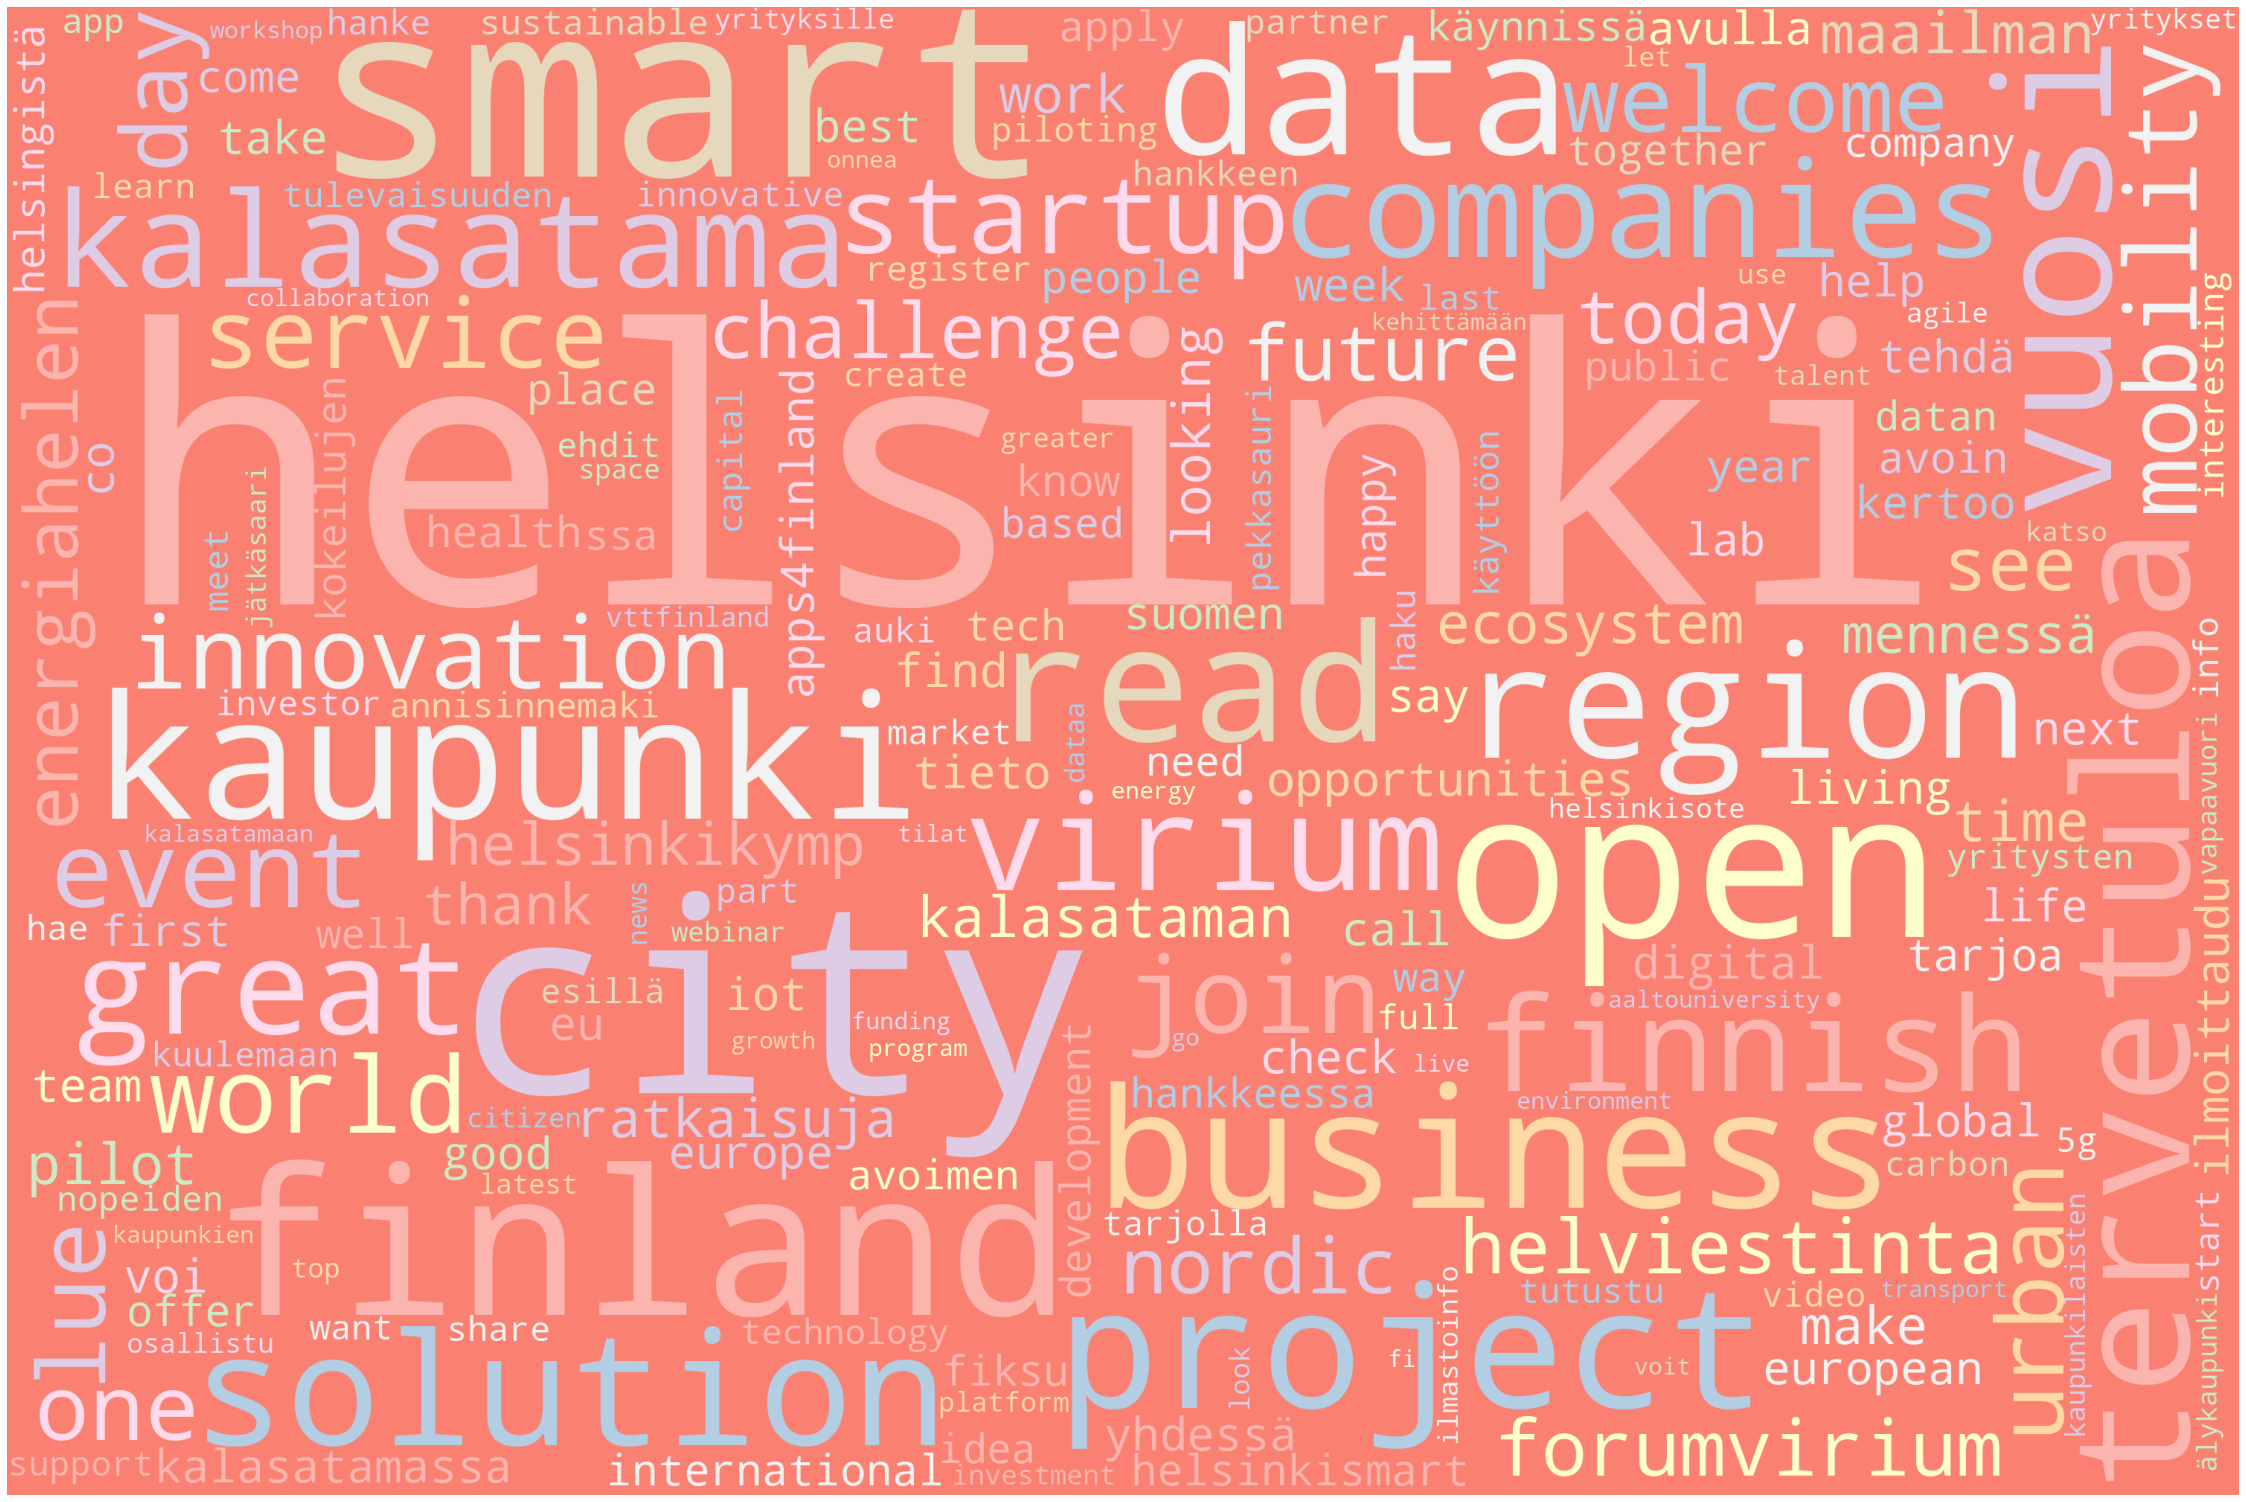

In [13]:
word_cloud.plot_cloud(tweet_words)

## Hashtags

In [14]:
hashtag_entities = utils.get_hashtags(tweets)
most_common_hashtags = Counter(hashtag_entities).most_common(50)
most_common_hashtags

[('helsinki', 1383),
 ('smartcity', 589),
 ('iot', 273),
 ('6aika', 269),
 ('älykaupunki', 249),
 ('kalasatama', 241),
 ('smartmobility', 239),
 ('fiksukalasatama', 233),
 ('nopeatkokeilut', 209),
 ('hiilineutraalihelsinki', 194),
 ('avoindata', 167),
 ('smartcities', 162),
 ('finland', 157),
 ('smartclean', 142),
 ('opendata', 126),
 ('data', 102),
 ('ilmastonmuutos', 100),
 ('helsinkismart', 96),
 ('älyliikenne', 95),
 ('maas', 91),
 ('innovation', 83),
 ('ilmasto', 80),
 ('startups', 77),
 ('apps4finland', 75),
 ('jätkäsaari', 74),
 ('startup', 73),
 ('5g', 63),
 ('helsinkismartregion', 60),
 ('liikenne', 56),
 ('joustotilat', 56),
 ('rekry', 55),
 ('smartkalasatama', 55),
 ('sähköauto', 54),
 ('ai', 52),
 ('innovaatio', 52),
 ('mobility', 52),
 ('hiilineutraali', 51),
 ('älykäskaupunki', 51),
 ('sopeutuminen', 51),
 ('healthtech', 49),
 ('hel2035', 45),
 ('ilmanlaatu', 44),
 ('mydata', 42),
 ('livinglab', 41),
 ('circulareconomy', 41),
 ('smartspecialisation', 41),
 ('health', 39),

## Timeline

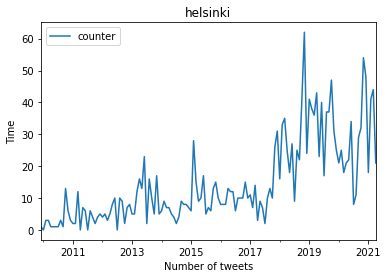

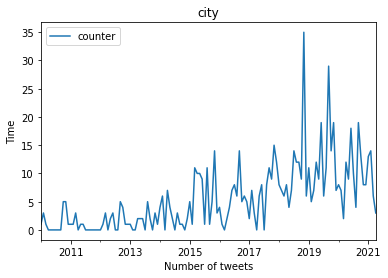

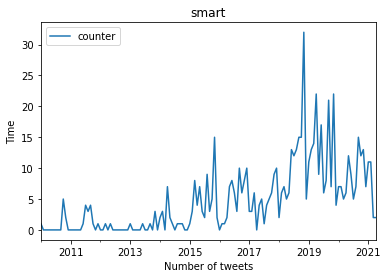

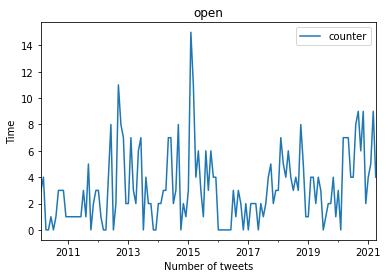

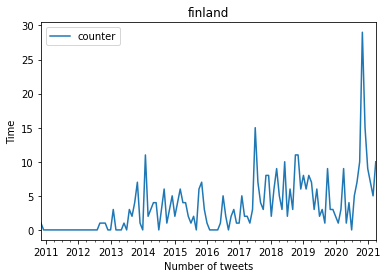

In [15]:
for i in range(5):
    trend_term = most_common_terms[i][0]
    timeline.plot_term_history(trend_term, tweets)

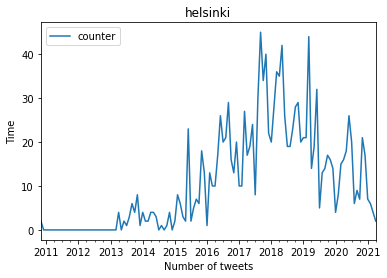

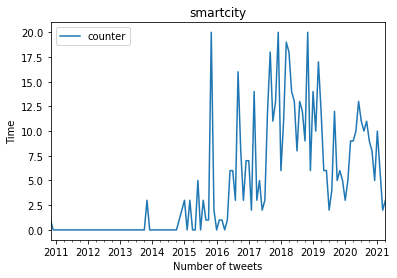

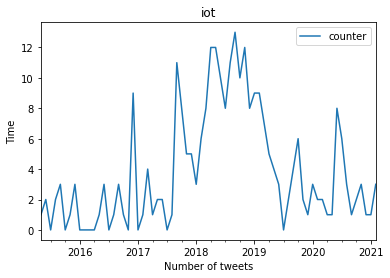

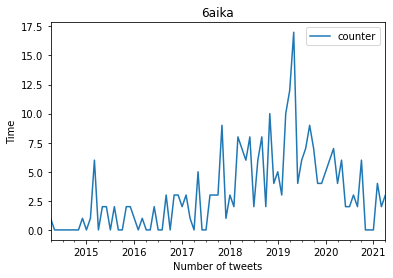

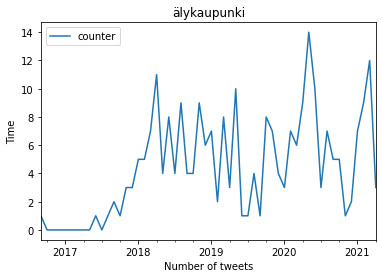

In [16]:
for i in range(5):
    trend_term = most_common_hashtags[i][0]
    timeline.plot_hashtag_history(trend_term, tweets)

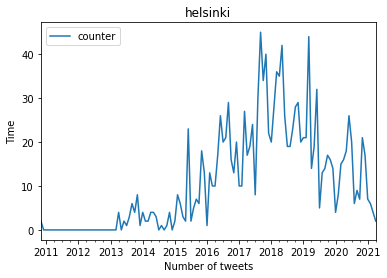

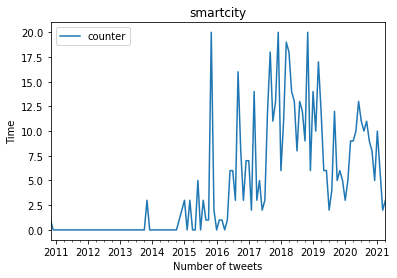

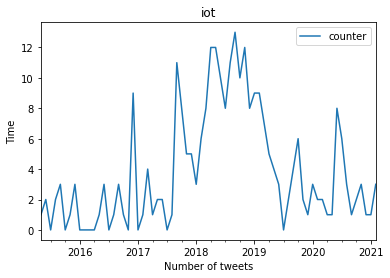

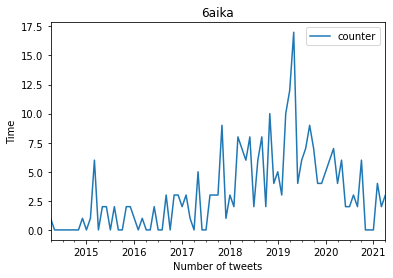

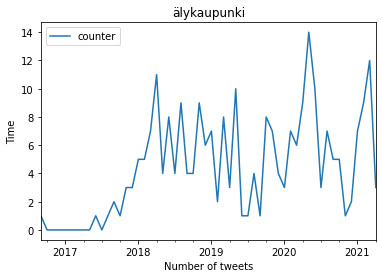

In [17]:
for i in range(5):
    trend_term = most_common_hashtags[i][0]
    timeline.plot_hashtag_history(trend_term, tweets)

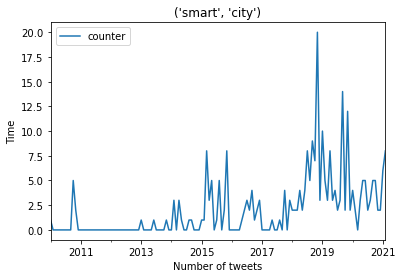

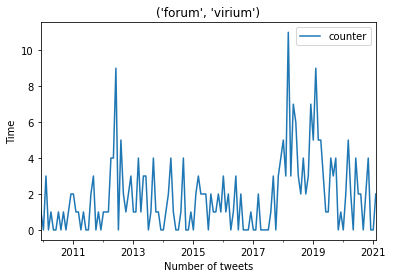

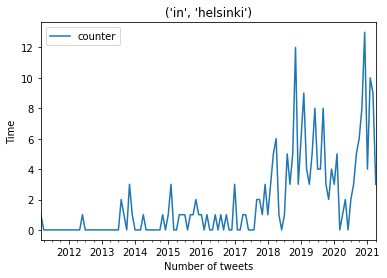

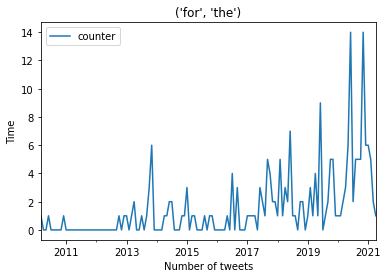

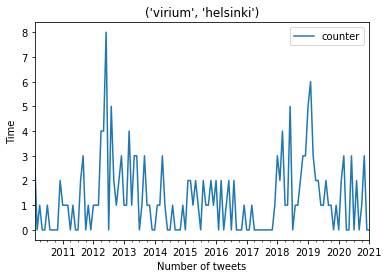

In [18]:
for i in range(5):
    trend_term = most_common_bigrams[i][0]
    timeline.plot_ngram_history(trend_term, tweets)

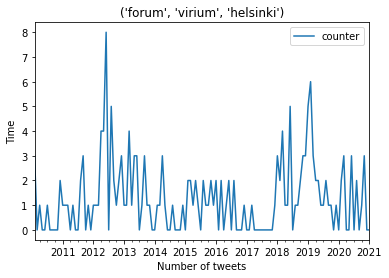

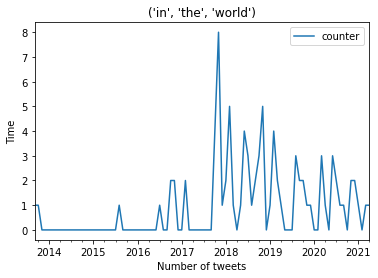

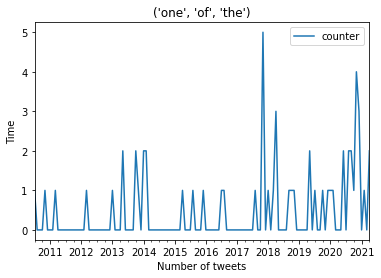

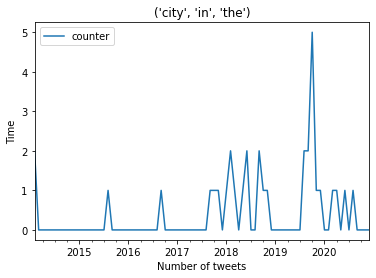

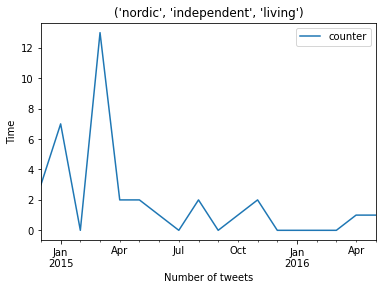

In [19]:
for i in range(5):
    trend_term = most_common_trigrams[i][0]
    timeline.plot_ngram_history(trend_term, tweets)